### Libraries

In [110]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D
import matplotlib.image as mpimg
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix as PCM
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import talos
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from sklearn.model_selection import train_test_split
import seaborn as sns
import scikitplot as skplt
from numpy import asarray
import datetime
import itertools
import io
%matplotlib inline
np.random.seed(123)

### Import Data

In [2]:
# Directory path
train_data_dir = 'Data/Training'
test_data_dir = 'Data/Testing'

In [3]:
# Get all the data in the directory Data/Training, and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64),class_mode="categorical", batch_size=2870)

# Get all the data in the directory Data/Testing, and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(64, 64),class_mode="categorical", batch_size=394)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [4]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

### EDA

In [5]:
train_generator.class_indices 

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [6]:
# Explore your dataset again
m_train = train_images.shape[0]
m_test = test_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))

print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 2870
Number of testing samples: 394
train_images shape: (2870, 64, 64, 3)
train_labels shape: (2870, 4)
test_images shape: (394, 64, 64, 3)
test_labels shape: (394, 4)


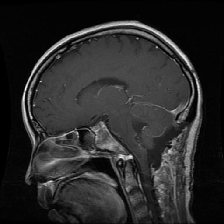

Label: 0


In [209]:
# Preview an image of each class
display(array_to_img(train_images[70]))
print('Label:',np.argmax(train_labels[70]))

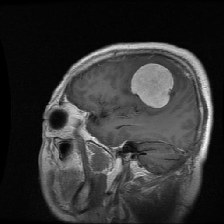

Label: 1


In [210]:
display(array_to_img(train_images[71]))
print('Label:',np.argmax(train_labels[71]))

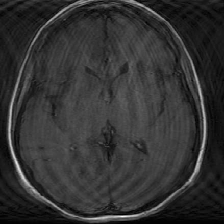

Label: 2


In [240]:
display(array_to_img(train_images[27]))
print('Label:',np.argmax(train_labels[27]))

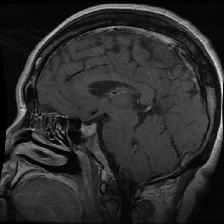

Label: 3


In [214]:
display(array_to_img(train_images[2]))
print('Label:',np.argmax(train_labels[2]))

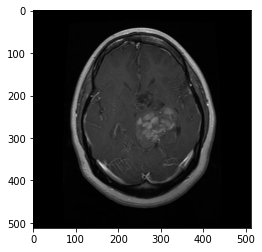

In [8]:
# Read Images by matplotlib to check the actual size of the images
img_sample = mpimg.imread('Data/Training/glioma_tumor/gg (1).jpg') 
  
# Output Images 
plt.imshow(img_sample) ;

In [9]:
# Check the size of the actual images
numpydata = asarray(img_sample)
print(numpydata.shape)

(512, 512, 3)


In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)

(2870, 12288)
(394, 12288)


### Baseline model with NN

In [13]:
#Designing the first model for base line
model1 = Sequential()
model1.add(Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model1.add(Dense(10, activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(4, activation='softmax'))

model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                245780    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
Total params: 246,069
Trainable params: 246,069
Non-trainable params: 0
_________________________________________________________________


In [15]:
results1 = model1.fit(train_img,
                    train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(test_img, test_labels))

Epoch 1/100
90/90 [==============================] - 1s 10ms/step - loss: 1.3355 - accuracy: 0.3563 - val_loss: 1.4647 - val_accuracy: 0.2563
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 1.1476 - accuracy: 0.5449 - val_loss: 1.5464 - val_accuracy: 0.3020
Epoch 3/100
90/90 [==============================] - 0s 2ms/step - loss: 1.0319 - accuracy: 0.5763 - val_loss: 1.5764 - val_accuracy: 0.3731
Epoch 4/100
90/90 [==============================] - 0s 2ms/step - loss: 0.9579 - accuracy: 0.5967 - val_loss: 1.6362 - val_accuracy: 0.3579
Epoch 5/100
90/90 [==============================] - 0s 2ms/step - loss: 0.8813 - accuracy: 0.6340 - val_loss: 2.4482 - val_accuracy: 0.2792
Epoch 6/100
90/90 [==============================] - 0s 3ms/step - loss: 0.8660 - accuracy: 0.6511 - val_loss: 2.7764 - val_accuracy: 0.2259
Epoch 7/100
90/90 [==============================] - 0s 2ms/step - loss: 0.8026 - accuracy: 0.6800 - val_loss: 1.6374 - val_accuracy: 0.3731
Epoch 8/100


Epoch 59/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9942 - val_loss: 3.4477 - val_accuracy: 0.7157
Epoch 60/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9930 - val_loss: 3.3242 - val_accuracy: 0.7335
Epoch 61/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9894 - val_loss: 2.7637 - val_accuracy: 0.7411
Epoch 62/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9778 - val_loss: 2.9985 - val_accuracy: 0.6954
Epoch 63/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1135 - accuracy: 0.9612 - val_loss: 2.8657 - val_accuracy: 0.7437
Epoch 64/100
90/90 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9940 - val_loss: 2.5757 - val_accuracy: 0.7310
Epoch 65/100
90/90 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8854 - val_loss: 3.0636 - val_accuracy: 0.7462
Epoch 

In [326]:
#Save model1 and its weights
model1.save('Models/model1.h5')
model1.save_weights('Models/model1_w.h5')

In [11]:
#Load model1 and its weights
model1 = load_model('Models/model1.h5')
model1.load_weights('Models/model1_w.h5')

In [12]:
y_pred1= model1.predict(test_img)

In [13]:
y_pred1 = np.argmax(y_pred1,axis=1)

In [14]:
y_test_new = np.argmax(test_labels,axis=1)

In [15]:
def class_report(model):
    
    y_pred = model.predict(test_img)
    y_pred = np.argmax(y_pred,axis=1)
    
    cm = confusion_matrix(y_test_new,y_pred)
    plot_confusion_matrix(conf_mat = cm,figsize=(6,6),class_names = ['Glioma','Meningioma','No','Pituitary'],
                     show_normed=True)
    plt.show();
    print('-------------------------------------------------------')
    print(classification_report(y_test_new,y_pred))

    return

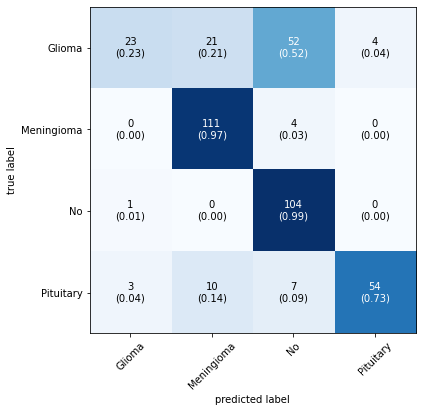

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.23      0.36       100
           1       0.78      0.97      0.86       115
           2       0.62      0.99      0.76       105
           3       0.93      0.73      0.82        74

    accuracy                           0.74       394
   macro avg       0.80      0.73      0.70       394
weighted avg       0.79      0.74      0.70       394



In [16]:
class_report(model1)

#### NN GridSearch 

* run Gridsearch on Neural Network by using Talos library for hyper-parameters tuning

In [50]:
params = {'activation':['relu', 'tanh'],
     'optimizer': ['Adam', "RMSprop"],
     'batch_size': [32, 64, 128],
     'epochs': [20, 60, 100],
         'dropout': [.3, .5]}

In [28]:
def NN_talos(train_img, train_labels, test_img, test_labels, params):
    
    model = Sequential()
    model.add(Dense(256, activation=params['activation'], input_shape=(12288,)))
    model.add(Dropout(params['dropout']))
    model.add(Dense(128, activation=params['activation']))
    model.add(Dropout(params['dropout']))
    model.add(Dense(64, activation=params['activation']))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer=params['optimizer'],
              loss='categorical_crossentropy',
              metrics=['acc'])
    
    results = model.fit(train_img, train_labels, validation_data=(test_img, test_labels),
                        batch_size=params['batch_size'], epochs=params['epochs'], verbose=0)
    
    return results, model

In [29]:
# Run the scan and save the results in a csv file
talos_results = talos.Scan(train_img, train_labels, params=params, model=NN_talos, experiment_name='GridSearch_NN')


 23%|██▎       | 146/648 [1:53:20<6:29:49, 46.59s/it]


 45%|████▍     | 290/648 [3:11:27<1:19:23, 13.31s/it]


 67%|██████▋   | 433/648 [5:16:55<5:28:37, 91.71s/it] 


 89%|████████▉ | 578/648 [6:44:30<35:57, 30.81s/it]


100%|██████████| 648/648 [7:16:44<00:00, 40.44s/it]


In [47]:
#read the csv file
Grid_NN_df = pd.read_csv('GridSearch_NN/012321181326.csv')

In [48]:
Grid_NN_df.drop(columns=['first_hidden_layer', 'second_hidden_layer'],axis=1, inplace=True)

In [49]:
#sort values descending
Grid_NN_df.sort_values('val_acc',ascending=False).head(15)

,round_epochs,loss,acc,val_loss,val_acc,activation,batch_size,dropout,epochs,optimizer
471,100,0.135681,0.950697,0.477844,0.868910,tanh,64,0.3,100,RMSprop
477,100,0.202134,0.931773,0.495008,0.863109,tanh,64,0.3,100,RMSprop
585,100,0.099282,0.967131,0.443049,0.863109,tanh,128,0.3,100,RMSprop
256,100,0.174154,0.935259,0.673072,0.861949,relu,128,0.3,100,RMSprop
591,100,0.123128,0.960657,0.531856,0.857309,tanh,128,0.3,100,RMSprop
581,100,0.154405,0.939741,0.516893,0.854988,tanh,128,0.3,100,RMSprop
592,100,0.166615,0.944223,0.472306,0.854988,tanh,128,0.3,100,RMSprop
263,100,0.115928,0.958167,0.691183,0.853828,relu,128,0.3,100,RMSprop
567,60,0.309714,0.895916,0.398228,0.852668,tanh,128,0.3,60,RMSprop
593,100,0.213270,0.927789,0.464929,0.851508,tanh,128,0.3,100,RMSprop


In [331]:
best_NN = talos_results.best_model(metric='val_acc', asc=False)

y_pred_best_NN = best_NN.predict(test_img)

In [332]:
best_NN.save('Models/best_NN.h5')
best_NN.save_weights('Models/best_NN_w.h5')

In [17]:
best_NN = load_model('Models/best_NN.h5')
best_NN.load_weights('Models/best_NN_w.h5')

In [53]:
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_shape=(12288,)))
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(4, activation='softmax'))
    
model2.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
    
results2 = model2.fit(train_img, train_labels, validation_data=(test_img, test_labels),
                    batch_size=64, epochs=100, verbose=1)

Epoch 1/100
45/45 [==============================] - 2s 32ms/step - loss: 1.5318 - acc: 0.3148 - val_loss: 1.5826 - val_acc: 0.3376
Epoch 2/100
45/45 [==============================] - 1s 30ms/step - loss: 1.2871 - acc: 0.4195 - val_loss: 1.5426 - val_acc: 0.2843
Epoch 3/100
45/45 [==============================] - 1s 29ms/step - loss: 1.1740 - acc: 0.4723 - val_loss: 1.8448 - val_acc: 0.2690
Epoch 4/100
45/45 [==============================] - 1s 30ms/step - loss: 1.1170 - acc: 0.4834 - val_loss: 1.6647 - val_acc: 0.2843
Epoch 5/100
45/45 [==============================] - 1s 30ms/step - loss: 1.0297 - acc: 0.5229 - val_loss: 1.6751 - val_acc: 0.2843
Epoch 6/100
45/45 [==============================] - 1s 32ms/step - loss: 0.9795 - acc: 0.5490 - val_loss: 1.4530 - val_acc: 0.3655
Epoch 7/100
45/45 [==============================] - 1s 30ms/step - loss: 0.9437 - acc: 0.5529 - val_loss: 1.6050 - val_acc: 0.3452
Epoch 8/100
45/45 [==============================] - 1s 30ms/step - loss: 0.

45/45 [==============================] - 1s 32ms/step - loss: 0.1363 - acc: 0.9517 - val_loss: 1.4619 - val_acc: 0.7310
Epoch 63/100
45/45 [==============================] - 1s 29ms/step - loss: 0.1172 - acc: 0.9610 - val_loss: 1.7533 - val_acc: 0.6447
Epoch 64/100
45/45 [==============================] - 1s 30ms/step - loss: 0.1351 - acc: 0.9521 - val_loss: 1.4345 - val_acc: 0.7513
Epoch 65/100
45/45 [==============================] - 1s 29ms/step - loss: 0.1097 - acc: 0.9619 - val_loss: 1.4574 - val_acc: 0.7538
Epoch 66/100
45/45 [==============================] - 1s 29ms/step - loss: 0.2014 - acc: 0.9305 - val_loss: 1.6333 - val_acc: 0.6878
Epoch 67/100
45/45 [==============================] - 1s 30ms/step - loss: 0.2671 - acc: 0.9165 - val_loss: 1.5189 - val_acc: 0.7284
Epoch 68/100
45/45 [==============================] - 1s 29ms/step - loss: 0.1259 - acc: 0.9540 - val_loss: 1.3964 - val_acc: 0.7335
Epoch 69/100
45/45 [==============================] - 1s 29ms/step - loss: 0.1273 

In [327]:
model2.save('Models/model2.h5')
model2.save_weights('Models/model2_w.h5')

In [18]:
model2 = load_model('Models/model2.h5')
model2.load_weights('Models/model2_w.h5')

### CNN

* Here is the baseline for convolutional neural networks, lots of trial and error involve to optimize each layer.

In [84]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
           
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.2))


model3.add(Conv2D(256, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.2))

          
model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.3))

model3.add(Dense(4, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])
          
results3 = model3.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/30
45/45 [==============================] - 8s 157ms/step - loss: 1.3715 - acc: 0.3168 - val_loss: 1.6533 - val_acc: 0.2157
Epoch 2/30
45/45 [==============================] - 7s 161ms/step - loss: 1.0876 - acc: 0.5164 - val_loss: 2.1688 - val_acc: 0.2335
Epoch 3/30
45/45 [==============================] - 7s 155ms/step - loss: 0.9030 - acc: 0.6195 - val_loss: 2.1857 - val_acc: 0.2640
Epoch 4/30
45/45 [==============================] - 7s 154ms/step - loss: 0.7327 - acc: 0.6873 - val_loss: 2.0156 - val_acc: 0.3426
Epoch 5/30
45/45 [==============================] - 7s 156ms/step - loss: 0.6429 - acc: 0.7421 - val_loss: 1.9371 - val_acc: 0.4746
Epoch 6/30
45/45 [==============================] - 7s 161ms/step - loss: 0.5680 - acc: 0.7684 - val_loss: 1.8538 - val_acc: 0.4492
Epoch 7/30
45/45 [==============================] - 8s 169ms/step - loss: 0.4501 - acc: 0.8217 - val_loss: 1.8056 - val_acc: 0.5228
Epoch 8/30
45/45 [==============================] - 8s 167ms/step - loss: 0.

In [328]:
model3.save('Models/model3.h5')
model3.save_weights('Models/model3_w.h5')

In [19]:
model2 = load_model('Models/model3.h5')
model2.load_weights('Models/model3_w.h5')

#### CNN GridSearch

* Run a Gridsearch on Convolutional neural network by using Talos library

In [97]:
params = {'activation':['relu', 'tanh'],
     'optimizer': ['Adam', 'RMSprop'],
     'batch_size': [64, 128],
     'epochs': [30, 60],
         'dropout': [0.2, 0.3]}

In [98]:
def CNN_talos(train_images, train_labels, test_images, test_labels, params):
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation=params['activation'], input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(params['dropout']))
               
    model.add(Conv2D(64, (3, 3), activation=params['activation']))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(params['dropout']))
    
    model.add(Conv2D(128, kernel_size = (3,3), activation =params['activation']))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(params['dropout']))
    
    
    model.add(Conv2D(256, kernel_size = (3,3), activation =params['activation']))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(params['dropout']))
    
              
    model.add(Flatten())
    model.add(Dense(512, activation = params['activation']))
    model.add(Dropout(params['dropout']))
    
    model.add(Dense(4, activation = "softmax"))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=params['optimizer'],
                  metrics=['acc'])
              
    results = model.fit(train_images, train_labels,
                        epochs=params['epochs'],
                        batch_size=params['batch_size'],
                        validation_data=(test_images, test_labels), verbose=0)
        
    return results, model

In [99]:
talos_results1 = talos.Scan(train_images, train_labels,
                            params=params, model=CNN_talos, experiment_name='GridSearch_CNN')






  0%|          | 0/32 [00:00<?, ?it/s]




  3%|▎         | 1/32 [02:36<1:20:45, 156.29s/it]




  6%|▋         | 2/32 [05:09<1:17:38, 155.27s/it]




  9%|▉         | 3/32 [10:09<1:36:08, 198.91s/it]




 12%|█▎        | 4/32 [15:15<1:47:46, 230.96s/it]




 16%|█▌        | 5/32 [17:46<1:33:05, 206.86s/it]




 19%|█▉        | 6/32 [20:19<1:22:42, 190.87s/it]




 22%|██▏       | 7/32 [25:21<1:33:24, 224.19s/it]




 25%|██▌       | 8/32 [30:27<1:39:30, 248.75s/it]




 28%|██▊       | 9/32 [32:59<1:24:11, 219.62s/it]




 31%|███▏      | 10/32 [35:31<1:13:05, 199.36s/it]




 34%|███▍      | 11/32 [40:35<1:20:42, 230.60s/it]




 38%|███▊      | 12/32 [45:43<1:24:41, 254.05s/it]




 41%|████      | 13/32 [48:23<1:11:28, 225.72s/it]




 44%|████▍     | 14/32 [51:08<1:02:17, 207.65s/it]




 47%|████▋     | 15/32 [56:36<1:09:01, 243.61s/it]




 50%|█████     | 16/32 [1:01:56<1:11:05, 266.61s/it]




 53%|█████▎    | 17/32 [1:04:51<59:45, 239.04s/it]  




 56%|█████▋    | 18/32

In [100]:
Grid_CNN_df = pd.read_csv('GridSearch_CNN/012521003836.csv')

In [105]:
Grid_CNN_df.sort_values('val_acc', ascending=False)

,round_epochs,loss,acc,val_loss,val_acc,activation,batch_size,dropout,epochs,optimizer
6,60,0.037729,0.986554,0.322413,0.932715,relu,64,0.3,60,Adam
14,60,0.040348,0.983068,0.311116,0.930394,relu,128,0.3,60,Adam
11,60,0.024727,0.992530,0.451448,0.928074,relu,128,0.2,60,RMSprop
5,30,0.125021,0.957669,0.270947,0.925754,relu,64,0.3,30,RMSprop
3,60,0.021356,0.989044,0.530614,0.924594,relu,64,0.2,60,RMSprop
2,60,0.013876,0.995518,0.404816,0.919954,relu,64,0.2,60,Adam
1,30,0.050860,0.984064,0.373917,0.919954,relu,64,0.2,30,RMSprop
7,60,0.057283,0.983068,0.439260,0.918793,relu,64,0.3,60,RMSprop
12,30,0.119265,0.959163,0.264122,0.918793,relu,128,0.3,30,Adam
30,60,0.029825,0.989542,0.425138,0.917633,tanh,128,0.3,60,Adam


In [104]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))
           
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))


model3.add(Conv2D(256, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

          
model3.add(Flatten())
model3.add(Dense(512, activation = "relu"))
model3.add(Dropout(0.3))

model3.add(Dense(4, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])
          
results3 = model3.fit(train_images, train_labels,
                    epochs=60,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/60
45/45 [==============================] - 16s 329ms/step - loss: 1.3553 - acc: 0.3314 - val_loss: 1.7452 - val_acc: 0.2538
Epoch 2/60
45/45 [==============================] - 15s 339ms/step - loss: 1.0675 - acc: 0.5388 - val_loss: 1.8261 - val_acc: 0.2157
Epoch 3/60
45/45 [==============================] - 14s 313ms/step - loss: 0.8370 - acc: 0.6569 - val_loss: 1.9035 - val_acc: 0.3020
Epoch 4/60
45/45 [==============================] - 15s 323ms/step - loss: 0.7206 - acc: 0.7009 - val_loss: 2.2735 - val_acc: 0.3579
Epoch 5/60
45/45 [==============================] - 15s 323ms/step - loss: 0.6056 - acc: 0.7590 - val_loss: 1.6771 - val_acc: 0.3604
Epoch 6/60
45/45 [==============================] - 14s 307ms/step - loss: 0.5797 - acc: 0.7521 - val_loss: 1.7429 - val_acc: 0.4645
Epoch 7/60
45/45 [==============================] - 14s 307ms/step - loss: 0.4643 - acc: 0.8222 - val_loss: 1.7708 - val_acc: 0.5102
Epoch 8/60
45/45 [==============================] - 14s 298ms/step - 

* Because there is no specific way to tackle the problem it wouldn't hurt to check the big to small approach.
   with that I mean we start from a large number of neurons and then start to shrink the number of neurons in each layer. However, it is computationally expensive because of the convolutional layers in CNN. 

In [107]:
model3 = Sequential()

model3.add(Conv2D(512, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.3))
           
model3.add(Conv2D(256, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))


model3.add(Conv2D(64, kernel_size = (3,3), activation ='relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

          
model3.add(Flatten())
model3.add(Dense(32, activation = "relu"))
model3.add(Dropout(0.3))

model3.add(Dense(4, activation = "softmax"))

model3.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])
          
results3 = model3.fit(train_images, train_labels,
                    epochs=60,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/60
45/45 [==============================] - 129s 3s/step - loss: 1.3954 - acc: 0.2786 - val_loss: 1.4112 - val_acc: 0.2132
Epoch 2/60
45/45 [==============================] - 130s 3s/step - loss: 1.3000 - acc: 0.3439 - val_loss: 1.5313 - val_acc: 0.2157
Epoch 3/60
45/45 [==============================] - 132s 3s/step - loss: 1.1229 - acc: 0.5109 - val_loss: 1.7043 - val_acc: 0.2665
Epoch 4/60
45/45 [==============================] - 131s 3s/step - loss: 0.9884 - acc: 0.5848 - val_loss: 1.7110 - val_acc: 0.2335
Epoch 5/60
45/45 [==============================] - 132s 3s/step - loss: 0.8315 - acc: 0.6631 - val_loss: 1.7227 - val_acc: 0.2868
Epoch 6/60
45/45 [==============================] - 131s 3s/step - loss: 0.7329 - acc: 0.7209 - val_loss: 1.8256 - val_acc: 0.3731
Epoch 7/60
45/45 [==============================] - 132s 3s/step - loss: 0.6979 - acc: 0.7156 - val_loss: 1.8396 - val_acc: 0.4340
Epoch 8/60
45/45 [==============================] - 132s 3s/step - loss: 0.6005 - a

In [22]:
best_CNN = talos_results1.best_model(metric='val_acc', asc=False)

y_pred_best = best_CNN.predict(test_images)

NameError: name 'talos_results1' is not defined

In [330]:
best_CNN.save('Models/best_CNN.h5')
best_CNN.save_weights('Models/best_CNN_w.h5')

In [20]:
best_CNN = load_model('Models/best_CNN.h5')
best_CNN.load_weights('Models/best_CNN_w.h5')

In [21]:
y_pred_best = np.argmax(y_pred_best,axis=1)

NameError: name 'y_pred_best' is not defined

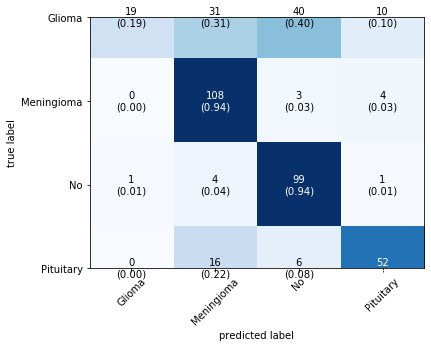

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.19      0.32       100
           1       0.68      0.94      0.79       115
           2       0.67      0.94      0.78       105
           3       0.78      0.70      0.74        74

    accuracy                           0.71       394
   macro avg       0.77      0.69      0.66       394
weighted avg       0.76      0.71      0.66       394



In [130]:
cm = confusion_matrix(y_test_new,y_pred_best)
plot_confusion_matrix(conf_mat = cm,figsize=(6,6),class_names = ['Glioma','Meningioma','No','Pituitary'],
                 show_normed=True)
plt.show();
print('-------------------------------------------------------')
print(classification_report(y_test_new,y_pred_best))

## Second Preprocessing

In this part I am planning on:

* Scaling the data (each pixel has a value between 0 to 255, I am going to make it between 0 and 1)


* Splitting the data: In my Previous preprocessing, I only had train and test set. Now I am going to add another split to my data as validation set


* Batching

In [23]:
# Get all the data in the directory Data/Training, and reshape them
train_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128),color_mode='grayscale', class_mode="categorical", batch_size=2870)


# Get all the data in the directory Data/Testing, and reshape them
test_generator2 = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128),color_mode='grayscale',class_mode="categorical", batch_size=394)



Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [24]:
X_train, y_train = next(train_generator2)
X_test, y_test = next(test_generator2)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=52)

In [37]:
print('X_train shape:',X_train.shape)
print('X_val shape:',X_val.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_val shape:',y_val.shape)
print('y_test shape:',y_test.shape)

X_train shape: (2583, 128, 128, 1)
X_val shape: (287, 128, 128, 1)
X_test shape: (394, 128, 128, 1)
y_train shape: (2583, 4)
y_val shape: (287, 4)
y_test shape: (394, 4)


In [27]:
y_train_new = np.argmax(y_train, axis=1)
y_train_new_classes =np.unique(y_train_new, return_counts=True)

* Labels and total number of them in each class

In [39]:
y_train_new_classes

(array([0, 1, 2, 3]), array([740, 747, 347, 749]))

In [29]:
y_test_classes = np.unique(np.argmax(y_test, axis=1), return_counts=True)
y_test_classes

(array([0, 1, 2, 3]), array([100, 115, 105,  74]))

In [30]:
y_val_classes= np.unique(np.argmax(y_val, axis=1), return_counts=True)
y_val_classes

(array([0, 1, 2, 3]), array([86, 75, 48, 78]))

In [31]:
def category(x):
    if x==0:
        y = 'Glioma'
    elif x==1:
        y = 'Meningioma'
    elif x==2:
        y = 'No'
    else:
        y = 'Pituitary'
    return y

In [65]:
df_classes1 = pd.DataFrame(y_train_new, columns=['classes'])
df_classes2 = pd.DataFrame(np.argmax(y_test, axis=1), columns=['classes'])
df_classes3 = pd.DataFrame(np.argmax(y_val, axis=1), columns=['classes'])
df_classes4 = pd.concat([df_classes1,df_classes2,df_classes3], ignore_index=True)
df_classes5 = df_classes4['classes'].apply(category)
df_classes = pd.DataFrame(df_classes5)
df_classes.head()

,classes
0,Meningioma
1,Pituitary
2,No
3,Meningioma
4,Meningioma


In this dataset there are 3264 images. As we can see in the following image we have balanced classes. 28.7 percent of images are classified as Glioma, 28.4 percent as Meningioma, 15.3 percent as No Tumor (healthy), and 27.6 percent as Pituitary.

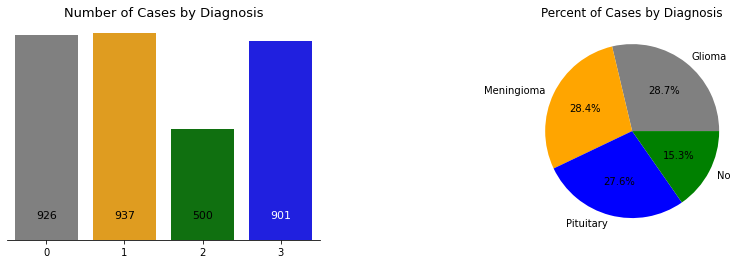

In [68]:
plt.figure(figsize = (14, 4))   

ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

proportion = df_classes['classes'].value_counts()/df_classes.shape[0]
Glioma = len(df_classes[df_classes['classes'] == 'Glioma'])
Meningioma = len(df_classes[df_classes['classes'] == 'Meningioma'])
No = len(df_classes[df_classes['classes'] == 'No'])
Pituitary = len(df_classes[df_classes['classes'] == 'Pituitary'])

sns.countplot(x = 'classes', data = df_classes4, 
              palette = ['grey', 'orange', 'green', 'blue'], ax = ax0)
ax0.set_title('Number of Cases by Diagnosis', size = 13)
ax0.set_xlabel(None)
ax0.text(x = 0, y = 100, s = Glioma, size = 11, 
         color = 'black', horizontalalignment = 'center')
ax0.text(x = 1, y = 100, s = Meningioma, size = 11,
        color = 'black', horizontalalignment = 'center')
ax0.text(x = 2, y = 100, s = No, size = 11,
        color = 'black', horizontalalignment = 'center')
ax0.text(x = 3, y = 100, s = Pituitary, size = 11,
        color = 'white', horizontalalignment = 'center')
ax0.yaxis.set_visible(False)
sns.despine(left = True)

proportion.plot(kind = 'pie', autopct = '%.1f%%', 
                explode = [0, 0, 0, 0], shadow = False,
                labels = ['Glioma', 'Meningioma', 'Pituitary', 'No'],
                colors = ['grey','orange', 'blue' , 'green'], 
                ax = ax1)
ax1.set_title('Percent of Cases by Diagnosis')
ax1.yaxis.set_visible(False)

plt.subplots_adjust(wspace = 0.5)
plt.show()



### CNN Model

* Designing a new CNN with new data preprocessing and also having a validation set at hand.

In [306]:
model4 = Sequential()

model4.add(Conv2D(64, (5, 5), activation='relu', input_shape=(128,128,1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

           
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model4.add(Flatten())
model4.add(Dense(128, activation = "relu"))

model4.add(Dense(4, activation='softmax'))


model4.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=3,verbose=0,mode="auto",
                                                  restore_best_weights=True)

results4 = model4.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                      callbacks=[early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/30
41/41 [==============================] - 36s 867ms/step - loss: 1.1805 - acc: 0.4907 - val_loss: 0.7110 - val_acc: 0.7038
Epoch 2/30
41/41 [==============================] - 33s 808ms/step - loss: 0.5525 - acc: 0.7803 - val_loss: 0.5630 - val_acc: 0.7700
Epoch 3/30
41/41 [==============================] - 33s 813ms/step - loss: 0.3384 - acc: 0.8578 - val_loss: 0.3637 - val_acc: 0.8571
Epoch 4/30
41/41 [==============================] - 34s 817ms/step - loss: 0.1677 - acc: 0.9442 - val_loss: 0.4888 - val_acc: 0.8397
Epoch 5/30
41/41 [==============================] - 34s 816ms/step - loss: 0.1301 - acc: 0.9614 - val_loss: 0.3317 - val_acc: 0.9094
Epoch 6/30
41/41 [==============================] - 33s 811ms/step - loss: 0.0592 - acc: 0.9868 - val_loss: 0.3710 - val_acc: 0.8850
Epoch 7/30
41/41 [==============================] - 33s 810ms/step - loss: 0.0443 - acc: 0.9863 - val_loss: 0.5638 - val_acc: 0.8641
Epoch 8/30
41/41 [==============================] - 33s 808ms/step - 

In [334]:
#Save model4 and its weights
model4.save('Models/model4.h5')
model4.save_weights('Models/model4_w.h5')

In [69]:
#Load model4 and its weights
model4 = load_model('Models/model4.h5')
model4.load_weights('Models/model4_w.h5')

In [70]:
test_loss, test_accuracy = model4.evaluate(X_test, y_test)

13/13 [==============================] - 1s 83ms/step - loss: 3.2104 - acc: 0.7132


In [71]:
print('Test Loss:{0: .4f}, Test Accuracy:{1: .2f}%'.format(test_loss, test_accuracy*100.))

Test Loss: 3.2104, Test Accuracy: 71.32%


In [72]:
y_pred4= model4.predict(X_test)
y_pred4 = np.argmax(y_pred4,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [73]:
print(classification_report(y_test_new,y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.17      0.28       100
           1       0.68      0.95      0.79       115
           2       0.67      0.95      0.79       105
           3       0.86      0.74      0.80        74

    accuracy                           0.71       394
   macro avg       0.76      0.70      0.66       394
weighted avg       0.74      0.71      0.66       394



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

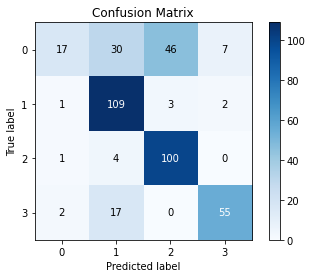

In [74]:
skplt.metrics.plot_confusion_matrix(y_test_new, y_pred4)

### Plotting Images and the Results

In [174]:
#Reshape the images into 128x128 form, suitable for matplotlib (original dimensions: 128x128x1)
images_plot = np.reshape(X_val, (287,128,128))
#Turn the categorical classes into integers
images_labels = np.argmax(y_val,axis=1)

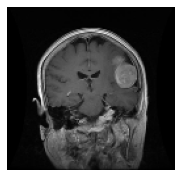

Label:1


In [200]:
#The image to be displayed and tested
i = 1

#plot the image
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(images_plot[i-1], cmap='gray', aspect='auto')
plt.show()

#Print the correctlabel for the image
print('Label:{}'.format(images_labels[i-1]))

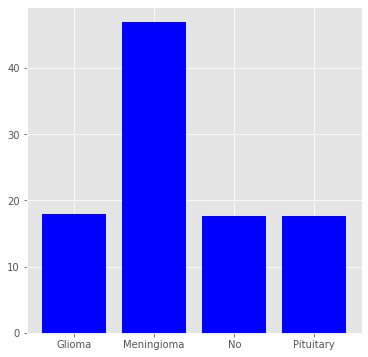

In [201]:
#Obtain the model's predictions (logits)
predictions= model6.predict(X_val[i-1:i])

#Convert those predictions into probabilities (recall that we incorporated the softmax activation in the last layer
#of my model since the problem is a multiclass categorical classification)
probabilities = tf.nn.softmax(predictions).numpy()
#convert the probabilities into percentages
probabilities = probabilities*100

#Create a bar chart to plot the probabilities for each class
plt.figure(figsize=(6,6))
plt.bar(x=[1,2,3,4], height=probabilities[0], color='Blue', tick_label=['Glioma','Meningioma','No','Pituitary']);

It plots the probability of each tumor being detected as calculated by the model
* As we can see for this particular image the network correctly predict the tumor as Meningioma with almost 49% confidence
* It seems like the network was confused. It predicts that there is 49% chance that tumor is Meningioma, 17% chance that there is no tumor, 17% chance for Pituitary and 17% chance for Glioma.

## Tensorboard

Visualizing in tensorboard can be a great help to improve the model. Tensorboard also gives me the ability to log the results and by checking histograms I would be able to check the learning process in each neuron in different layers.

In [79]:
model5 = Sequential()

model5.add(Conv2D(64, (5, 5), activation='relu', input_shape=(128,128,1)))
model5.add(MaxPooling2D(pool_size=(2, 2)))

           
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model5.add(Flatten())
model5.add(Dense(128, activation = "relu"))

model5.add(Dense(4, activation='softmax'))


model5.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])

In [80]:
#to prevent overfitting I used early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=3,verbose=0,mode="auto",
                                                  restore_best_weights=True)

#To have a folder for each iteration and save them in chronological order
log_dir = 'Logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
#By using this callback, the training process will be recorded
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [81]:
results5 = model5.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    callbacks=[tensorboard_callback, early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/30
41/41 [==============================] - 36s 879ms/step - loss: 1.3819 - acc: 0.4245 - val_loss: 0.8193 - val_acc: 0.6551
Epoch 2/30
41/41 [==============================] - 34s 821ms/step - loss: 0.6479 - acc: 0.7248 - val_loss: 0.5730 - val_acc: 0.7596
Epoch 3/30
41/41 [==============================] - 34s 833ms/step - loss: 0.3768 - acc: 0.8435 - val_loss: 0.5633 - val_acc: 0.7805
Epoch 4/30
41/41 [==============================] - 35s 858ms/step - loss: 0.2652 - acc: 0.8934 - val_loss: 0.4468 - val_acc: 0.8432
Epoch 5/30
41/41 [==============================] - 35s 857ms/step - loss: 0.1336 - acc: 0.9600 - val_loss: 0.4550 - val_acc: 0.8502
Epoch 6/30
41/41 [==============================] - 35s 850ms/step - loss: 0.0986 - acc: 0.9715 - val_loss: 0.4827 - val_acc: 0.8641
Epoch 7/30
41/41 [==============================] - 35s 848ms/step - loss: 0.0474 - acc: 0.9884 - val_loss: 0.4956 - val_acc: 0.8746


In [335]:
model5.save('Models/model5.h5')
model5.save_weights('Models/model5_w.h5')

In [78]:
model5 = load_model('Models/model5.h5')
model5.load_weights('Models/model5_w.h5')

### CNN Model with CM

* Define a function for confusion matrix and saving it in a png file, and show it in tensorboard images is the process of this step.

In [82]:
model6 = Sequential()

model6.add(Conv2D(64, (5, 5), activation='relu', input_shape=(128,128,1)))
model6.add(MaxPooling2D(pool_size=(2, 2)))

           
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model6.add(Flatten())
model6.add(Dense(128, activation = "relu"))

model6.add(Dense(4, activation='softmax'))


model6.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['acc'])

In [83]:
log_dir = 'logs/fit/' + 'run-1'
# define a file writer variable for logging purposes
file_writer_cm = tf.summary.create_file_writer(log_dir + '/cm')

In [84]:
def plot_confusion_Matrix(cm, class_names):
    
    figure= plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    #Normalize the confusion matrix
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    #use white text if squares are dark; otherwise black.
    threshold = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = 'white' if cm[i, j] > threshold else 'black'
        plt.text(j, i, cm[i, j], horizontalalignment='center', color=color)
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    return figure

In [85]:
def plot_to_image(figure):
    '''Converts the matplotlib plot specified by 'figure' to a PNG image and returns it.
    The supplied figure is closed and inaccessible after this call.'''
    
    # Save the plot to a PNG in memory.
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    
    # closing the figure prevents it from being displayed directly inside the notebook.
    plt.close(figure)
    buf.seek(0)
    
    # Convert PNG buffer to TF image
    image= tf.image.decode_png(buf.getvalue(), channels=4)
    
    # Add the batch dimension
    image = tf.expand_dims(image, 0)
    
    return image

In [150]:
def log_confusion_Matrix(epoch, logs):
    # Use the model to predict the values from the validation dataset.
    test_pred_raw = model8.predict(test_images)
    test_pred = np.argmax(test_pred_raw, axis=1)
    
    # Calculate the confusion matrix
    y_val_new = np.argmax(test_labels, axis=1)
    cm = confusion_matrix(y_val_new, test_pred)
    
    # Log the confusion matrix as an image summary
    figure= plot_confusion_Matrix(cm, class_names=['Glioma', 'Meningioma', 'No', 'Pituitary'])
    cm_image = plot_to_image(figure)
    
    # Log the confusion matrix as an image summary
    with file_writer_cm.as_default():
        tf.summary.image('Confusion Matrix', cm_image, step=epoch)

In [91]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0,patience=5,verbose=0,mode="auto",
                                                  restore_best_weights=True)
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_Matrix)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [92]:
results6 = model6.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    callbacks=[cm_callback, tensorboard_callback, early_stopping],
                    validation_data=(X_val, y_val))

Epoch 1/30
41/41 [==============================] - 36s 869ms/step - loss: 0.0644 - acc: 0.9806 - val_loss: 0.4805 - val_acc: 0.8676
Epoch 2/30
41/41 [==============================] - 35s 844ms/step - loss: 0.0414 - acc: 0.9892 - val_loss: 0.5909 - val_acc: 0.8850
Epoch 3/30
41/41 [==============================] - 34s 839ms/step - loss: 0.0307 - acc: 0.9930 - val_loss: 0.5355 - val_acc: 0.8711
Epoch 4/30
41/41 [==============================] - 34s 841ms/step - loss: 0.0174 - acc: 0.9969 - val_loss: 0.6082 - val_acc: 0.8780
Epoch 5/30
41/41 [==============================] - 33s 811ms/step - loss: 0.0088 - acc: 0.9988 - val_loss: 0.6262 - val_acc: 0.8850
Epoch 6/30
41/41 [==============================] - 33s 797ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.6547 - val_acc: 0.8815


In [336]:
model6.save('Models/model6.h5')
model6.save_weights('Models/model6_w.h5')

In [ ]:
model6 = load_model('Models/model6.h5')
model6.load_weights('Models/model6_w.h5')

In [168]:
y_pred_val = model6.predict(X_val)
y_pred_val = np.argmax(y_pred_val,axis=1)

y_val_128 = np.argmax(y_val,axis=1)

In [169]:
clf_report = classification_report(y_val_128,y_pred_val)
print(clf_report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        86
           1       0.72      0.84      0.78        75
           2       0.87      0.85      0.86        48
           3       0.97      0.95      0.96        78

    accuracy                           0.87       287
   macro avg       0.87      0.87      0.87       287
weighted avg       0.88      0.87      0.87       287



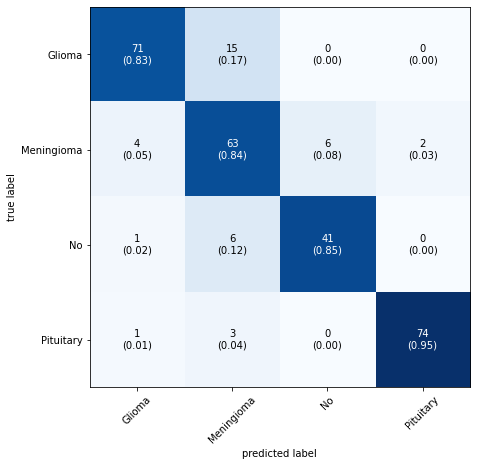

In [170]:
cm = confusion_matrix(y_val_128,y_pred_val)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Glioma','Meningioma','No','Pituitary'],
                     show_normed=True);

In [165]:
y_pred= model6.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

y_test_128 = np.argmax(y_test,axis=1)

In [166]:
clf_report = classification_report(y_test_128,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.21      0.34       100
           1       0.59      0.92      0.72       115
           2       0.70      0.97      0.81       105
           3       0.89      0.57      0.69        74

    accuracy                           0.69       394
   macro avg       0.78      0.67      0.64       394
weighted avg       0.77      0.69      0.64       394



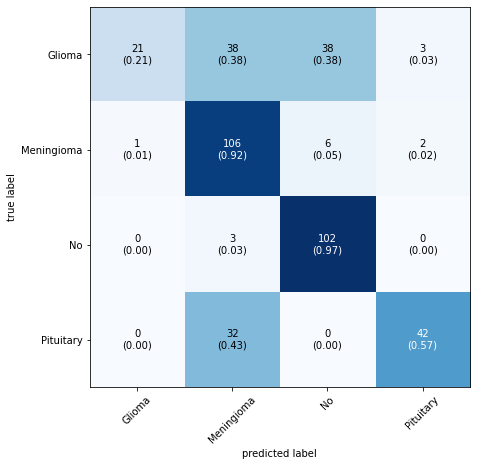

In [167]:
cm = confusion_matrix(y_test_128,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Glioma','Meningioma','No','Pituitary'],
                     show_normed=True);

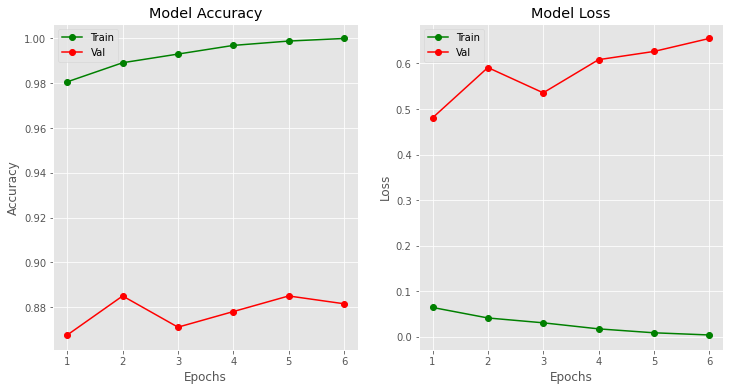

In [173]:
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,7)
plt.subplot(1,2,1)
plt.plot(epochs,results6.history["acc"],'go-')
plt.plot(epochs,results6.history["val_acc"],'ro-')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,results6.history["loss"],'go-')
plt.plot(epochs,results6.history["val_loss"],'ro-')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Val'],loc = "upper left")

plt.show()

### Visualizing in Tensorboard

In [90]:
%load_ext tensorboard
%tensorboard --logdir 'logs/fit/run-1'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Pretrained Model

* In this step I am planning on using a pretrained model (EfficientNetB0)
* Also using images in bigger size (224 x 224 x 3)

In [115]:
# Get all the data in the directory Data/Training, and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(224, 224),class_mode="categorical", batch_size=2870)

# Get all the data in the directory Data/Testing, and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(224, 224),class_mode="categorical", batch_size=394)



Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [116]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

In [118]:
effnet = EfficientNetB0(weights = "imagenet",include_top=False,input_shape=(224,224,3))

In [120]:
model7 = effnet.output
model7 = GlobalAveragePooling2D()(model7)
model7 = Dropout(0.5)(model7)
model7 = Dense(4,activation = "softmax")(model7)

model7 = Model(inputs = effnet.input,outputs = model7)

In [121]:
model7.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
____________________________________________________________________________________________

In [122]:
model7.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [123]:
checkpoint = ModelCheckpoint("Models/effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

In [125]:
results7 = model7.fit(train_images,train_labels,epochs=50,validation_data = (test_images,test_labels),verbose=1,
                              callbacks=[checkpoint,reduce_lr,earlystop])

Epoch 1/50
90/90 [==============================] - 417s 5s/step - loss: 0.0652 - accuracy: 0.9843 - val_loss: 2.5174 - val_accuracy: 0.2665

Epoch 00001: val_accuracy did not improve from 0.27157
Epoch 2/50
90/90 [==============================] - 427s 5s/step - loss: 0.0596 - accuracy: 0.9826 - val_loss: 2.0052 - val_accuracy: 0.2919

Epoch 00002: val_accuracy improved from 0.27157 to 0.29188, saving model to Models/effnet.h5
Epoch 3/50
90/90 [==============================] - 430s 5s/step - loss: 0.0607 - accuracy: 0.9815 - val_loss: 1.6519 - val_accuracy: 0.3909

Epoch 00003: val_accuracy improved from 0.29188 to 0.39086, saving model to Models/effnet.h5
Epoch 4/50
90/90 [==============================] - 431s 5s/step - loss: 0.0560 - accuracy: 0.9868 - val_loss: 1.6333 - val_accuracy: 0.4264

Epoch 00004: val_accuracy improved from 0.39086 to 0.42640, saving model to Models/effnet.h5
Epoch 5/50
90/90 [==============================] - 385s 4s/step - loss: 0.0565 - accuracy: 0.9829

In [157]:
y_pred= model7.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)

In [158]:
y_test_224 = np.argmax(test_labels,axis=1)

In [159]:
clf_report = classification_report(y_test_224,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.26      0.41       100
           1       0.66      0.99      0.79       115
           2       0.79      1.00      0.88       105
           3       0.93      0.77      0.84        74

    accuracy                           0.77       394
   macro avg       0.84      0.76      0.73       394
weighted avg       0.83      0.77      0.73       394



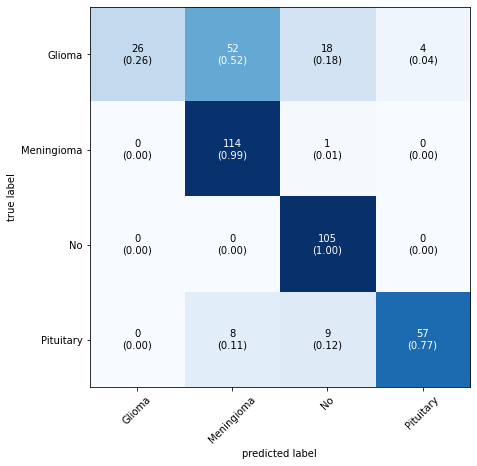

In [160]:
cm = confusion_matrix(y_test_224,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ['Glioma','Meningioma','No','Pituitary'],
                     show_normed=True);

### Use Tensorboard for pretrained Model

* Saving the results and log them in tensorboard would be a great help for further research

In [151]:
log_dir = 'logs/fit/' + 'run-2'

In [152]:
model8 = effnet.output
model8 = GlobalAveragePooling2D()(model8)
model8 = Dropout(0.5)(model8)
model8 = Dense(4,activation = "softmax")(model8)

model8 = Model(inputs = effnet.input,outputs = model8)

In [153]:
model8.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [154]:
cm_callback = tf.keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_Matrix)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

checkpoint = ModelCheckpoint("Models/effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

In [155]:
results8 = model8.fit(train_images,train_labels,epochs=50,validation_data = (test_images,test_labels),verbose=1,
                              callbacks=[checkpoint, reduce_lr, cm_callback,tensorboard_callback, earlystop])

Epoch 1/50
90/90 [==============================] - 399s 4s/step - loss: 0.4537 - accuracy: 0.8308 - val_loss: 3.3099 - val_accuracy: 0.2716

Epoch 00001: val_accuracy improved from -inf to 0.27157, saving model to Models/effnet.h5
Epoch 2/50
90/90 [==============================] - 388s 4s/step - loss: 0.0484 - accuracy: 0.9887 - val_loss: 1.9632 - val_accuracy: 0.1396

Epoch 00002: val_accuracy did not improve from 0.27157
Epoch 3/50
90/90 [==============================] - 390s 4s/step - loss: 0.0351 - accuracy: 0.9905 - val_loss: 45.9482 - val_accuracy: 0.2234

Epoch 00003: val_accuracy did not improve from 0.27157

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 4/50
90/90 [==============================] - 386s 4s/step - loss: 0.0205 - accuracy: 0.9946 - val_loss: 3.7328 - val_accuracy: 0.2893

Epoch 00004: val_accuracy improved from 0.27157 to 0.28934, saving model to Models/effnet.h5
Epoch 5/50
90/90 [==============================] - 387s

In [156]:
%load_ext tensorboard
%tensorboard --logdir 'logs/fit/run-2'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Study Data Augmentation

* Load data by using pillow library
* Flip a sample image horizontally
* Flip a sample image vertically

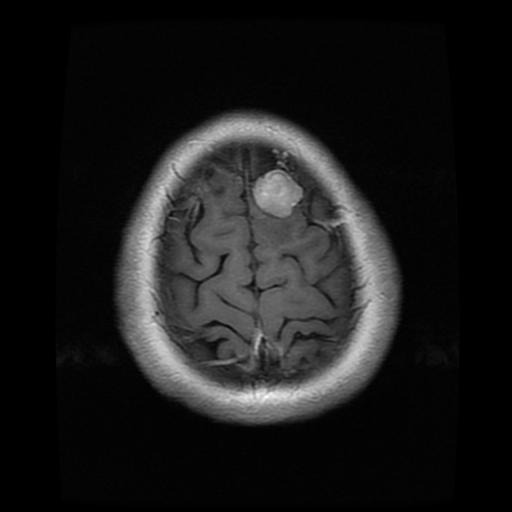

In [242]:
im1 = Image.open('Data/Training/meningioma_tumor/m (117).jpg')
im1

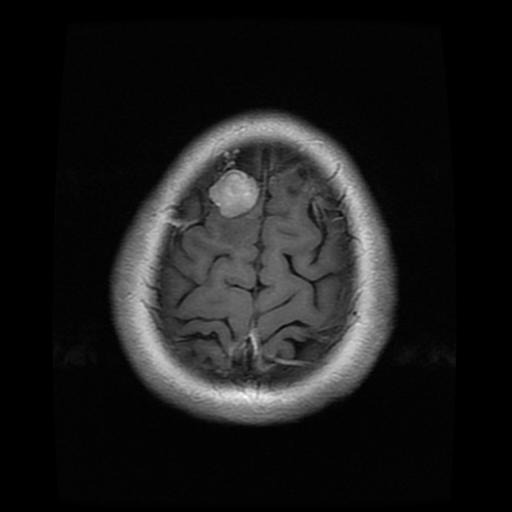

In [244]:
# Horizontal mirroring
out1 = im1.transpose(Image.FLIP_LEFT_RIGHT)
out1

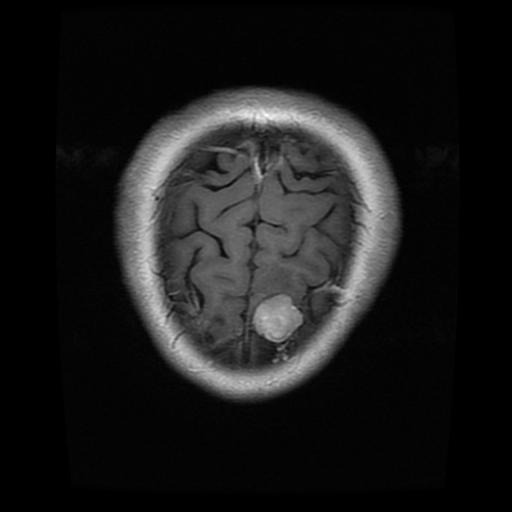

In [245]:
out2 = im1.transpose(Image.FLIP_TOP_BOTTOM)
out2

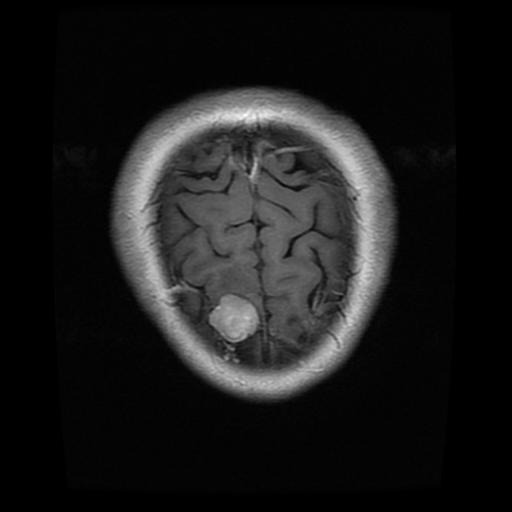

In [246]:
out3 = out2.transpose(Image.FLIP_LEFT_RIGHT)
out3